# **Support Vector Machine (SVM)**

SVM is used for Classification as well as Regression problems. In order to make it simple to classify fresh data points in the future, the SVM method seeks to identify the optimal line or decision boundary that can divide n-dimensional space into classes. We refer to this optimal decision boundary as a hyperplane.


In [3]:
import numpy as np

class SVM:
    def __init__(self, learning_rate=0.01, n_iterations=1000, alpha=1.0):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.alpha = alpha  # Regularization strength
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Convert y to {-1, 1}
        y_ = np.where(y <= 0, -1, 1)

        # Gradient Descent
        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.weights) + self.bias) >= 1

                if condition:
                    dw = 2 * self.alpha * self.weights
                else:
                    dw = 2 * self.alpha * self.weights - np.dot(x_i, y_[idx])

                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * (2 * self.alpha * self.bias if condition else 1)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.sign(linear_output)

Accuracy: 0.75


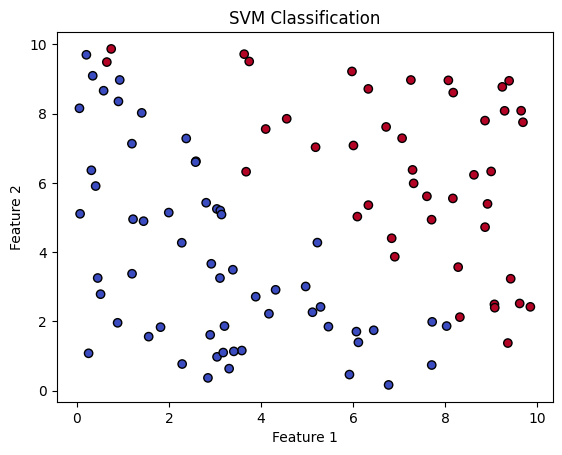

In [4]:
# testing a case
if __name__ == "__main__":
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    import matplotlib.pyplot as plt

   # Generating a simple dataset
    np.random.seed(42)
    X = np.random.rand(100, 2) * 10
    y = np.where(X[:, 0] + X[:, 1] > 10, 1, -1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    svm = SVM(learning_rate=0.01, n_iterations=1000, alpha=0.1)
    svm.fit(X_train, y_train)

    predictions = svm.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    print(f'Accuracy: {accuracy}')

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', marker='o', edgecolors='k')
    plt.title("SVM Classification")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()